# Chapter 1: Computing with Python

### Overview: a typical Python-based scientific computing stack.
![software stack](pics/software-stack-overview.png)

* Resources:
- [SciPy](http://www.scipy.org)
- [Python Numeric & Scientific topics](http://wiki.python.org/moin/NumericAndScientific)

## Interpreter
- The easist way to execute Python code: run the program directly.
- Use Jupyter magic command to write Python source file to disk:

In [1]:
%%writefile hello.py
print("Hello from Python!")

Overwriting hello.py


* Use the ! system shell command (included in the Python Jupyter kernel) to interactively run Python with hello.py as its argument.

In [2]:
!python hello.py

Hello from Python!


In [3]:
!python --version

Python 3.6.5 :: Anaconda, Inc.


## Input and output caching

* Input & output history can be accessed using __In__ (a list) & __Out__ (a dictionary). Both can be indexed with a cell number. 

In [4]:
3 * 3

9

In [5]:
In[1]

'get_ipython().run_cell_magic(\'writefile\', \'hello.py\', \'print("Hello from Python!")\')'

* A single underscore = the most recent output; 
* A double underscore = the _next_ most recent output.

In [6]:
1+1

2

In [7]:
2+2

4

In [8]:
_, __

(4, 2)

In [9]:
# In = a list
In

['',
 'get_ipython().run_cell_magic(\'writefile\', \'hello.py\', \'print("Hello from Python!")\')',
 "get_ipython().system('python hello.py')",
 "get_ipython().system('python --version')",
 '3 * 3',
 'In[1]',
 '1+1',
 '2+2',
 '_, __',
 '# In = a list\nIn']

In [10]:
# Out = a dictionary
Out

{4: 9,
 5: 'get_ipython().run_cell_magic(\'writefile\', \'hello.py\', \'print("Hello from Python!")\')',
 6: 2,
 7: 4,
 8: (4, 2),
 9: ['',
  'get_ipython().run_cell_magic(\'writefile\', \'hello.py\', \'print("Hello from Python!")\')',
  "get_ipython().system('python hello.py')",
  "get_ipython().system('python --version')",
  '3 * 3',
  'In[1]',
  '1+1',
  '2+2',
  '_, __',
  '# In = a list\nIn',
  '# Out = a dictionary\nOut']}

In [11]:
# Suppress output results by ending statement with a semicolon
1+2;

## Autocompletion

* The __Tab__ key activates autocompletion (displays list of symbol names that are valid completions of what has been typed thus far.)

In [12]:
import os

* Results of typing "os.w", followed by \t:

![autocompletion](pics/autocompletion.png)

## Documentation

* "Docstrings" provide a built-in reference manual for most Python modules. Display the docstring by appending a Python object with "?".

In [13]:
import math

In [14]:
math.cos?

Docstring:
cos(x)

Return the cosine of x (measured in radians).
Type:      builtin_function_or_method


## Interaction with System Shell

* Anything after ! is evaluated using the system shell, such as bash.
* (I use Ubuntu Linux as my laptop OS. Your Windows equivalents will vary.)

In [15]:
!touch file1.py file2.py file3.py

In [16]:
!ls file*

file1.py  file2.py  file3.py


In [17]:
# output of a system shell command
# can be captured in a Python variable
files = !ls file*

In [18]:
len(files)

3

In [19]:
files

['file1.py', 'file2.py', 'file3.py']

In [20]:
# pass Python variable values to shell commands
# by prefixing the variable name with $.
file = "file1.py"

In [21]:
!ls -l $file

-rw-rw-r-- 1 bjpcjp bjpcjp 0 May  5 12:04 file1.py


## IPython Extensions

* Commands start with one or two "%" characters. A single % is used for single-line commands; dual %% is used for cells (multiple lines).

* %lsmagic returns a list of available commands.

In [23]:
%lsmagic?

Docstring: List currently available magic functions.
File:      ~/anaconda3/lib/python3.6/site-packages/IPython/core/magics/basic.py


## Running scripts

In [24]:
%%writefile fib.py

def fib(N): 
    """ 
    Return a list of the first N Fibonacci numbers.
    """ 
    f0, f1 = 0, 1
    f = [1] * N
    for n in range(1, N):
        f[n] = f0 + f1
        f0, f1 = f1, f[n]

    return f

print(fib(10))

Overwriting fib.py


In [25]:
!python fib.py

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [26]:
%run fib.py

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [27]:
fib(6)

[1, 1, 2, 3, 5, 8]

## Listing all defined symbols

* __%who__ lists all defined symbols
* __%whos__ provides more detailed info.

In [28]:
%who

fib	 file	 files	 math	 os	 


In [29]:
%whos

Variable   Type        Data/Info
--------------------------------
fib        function    <function fib at 0x7fe5bc3cd1e0>
file       str         file1.py
files      SList       ['file1.py', 'file2.py', 'file3.py']
math       module      <module 'math' from '/hom<...>36m-x86_64-linux-gnu.so'>
os         module      <module 'os' from '/home/<...>da3/lib/python3.6/os.py'>


## Debugger

* Use __%debug__ to step directly into the Python debugger.

In [30]:
# fib function fails - can't use floating point numbers.
fib(1.0)

TypeError: can't multiply sequence by non-int of type 'float'

In [32]:
%debug

> /home/bjpcjp/projects/code/python-numerical/Numeric-Python/fib.py(7)fib()
      5     """ 
      6     f0, f1 = 0, 1
----> 7     f = [1] * N
      8     for n in range(1, N):
      9         f[n] = f0 + f1



## Resetting the Python namespace

In [34]:
%reset

Nothing done.


## Timing and profiling code

* __%timeit__ and __%time__ provide simple benchmarking utilities.

In [35]:
# first, re-define fibonacci code used above.
def fib(N): 
    """ 
    Return a list of the first N Fibonacci numbers.
    """ 
    f0, f1 = 0, 1
    f = [1] * N
    for n in range(1, N):
        f[n] = f0 + f1
        f0, f1 = f1, f[n]

    return f

In [36]:
%timeit fib(50)

5.88 µs ± 27 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [37]:
# %time only runs once. less accurate estimate.
result = %time fib(100)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 26.5 µs


In [38]:
len(result)

100

* The __cProfile__ module provides __%prun__ (for statements) and __%run__ (for external scripts) profiling commands.

In [39]:
import numpy as np

def random_walker_max_distance(M, N):
    """
    Simulate N random walkers taking M steps
    Return the largest distance from the starting point.
    """
    trajectories = [np.random.randn(M).cumsum() 
                    for _ in range(N)]
    return np.max(np.abs(trajectories))

In [40]:
# returns call counts, runtime & cume runtime for
# each function.
%prun random_walker_max_distance(400, 10000)

         20010 function calls in 0.222 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10000    0.171    0.000    0.171    0.000 {method 'randn' of 'mtrand.RandomState' objects}
    10000    0.027    0.000    0.027    0.000 {method 'cumsum' of 'numpy.ndarray' objects}
        1    0.014    0.014    0.220    0.220 <ipython-input-39-8a67fb24c99e>:3(random_walker_max_distance)
        1    0.005    0.005    0.204    0.204 <ipython-input-39-8a67fb24c99e>:8(<listcomp>)
        1    0.002    0.002    0.222    0.222 <string>:1(<module>)
        1    0.002    0.002    0.002    0.002 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.000    0.000    0.222    0.222 {built-in method builtins.exec}
        1    0.000    0.000    0.002    0.002 fromnumeric.py:69(_wrapreduction)
        1    0.000    0.000    0.002    0.002 fromnumeric.py:2397(amax)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:70(<dictcomp>)
  

### Jupyter: External image rendering

In [41]:
from IPython.display import display, Image, HTML, Math

In [42]:
Image(url='http://python.org/images/python-logo.gif')

### Jupyter: HTML rendering

In [47]:
import scipy, numpy, matplotlib
modules = [numpy, matplotlib, scipy]

row = "<tr><td>%s</td><td>%s</td></tr>"
rows = "\n".join(
    [row % 
     (module.__name__, module.__version__) 
     for module in modules])
table = "<table><tr><th>Library</th><th>Version</th></tr> %s </table>" % rows

In [48]:
HTML(table)

Library,Version
numpy,1.16.2
matplotlib,3.0.2
scipy,1.1.0


In [50]:
# another method
class HTMLdisplayer(object):
    def __init__(self,code):
        self.code = code
    def _repr_html_(self):
        return self.code
    
HTMLdisplayer(table)

Library,Version
numpy,1.16.2
matplotlib,3.0.2
scipy,1.1.0


### Jupyter: Formula rendering using Latex

In [53]:
Math(r'\hat{H} = -\frac{1}{2}\epsilon \hat{\sigma}_z-\frac{1}{2}\delta \hat{\sigma}_x')

<IPython.core.display.Math object>

### Jupyter: UI Widgets

** Needs debugging: slider widget doesn't appear. **

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def f(mu):
    X = stats.norm(loc=mu, scale=np.sqrt(mu))
    N = stats.poisson(mu)
    x = np.linspace(0, X.ppf(0.999))
    n = np.arange(0, x[-1])
    
    fig, ax = plt.subplots()
    ax.plot(x, X.pdf(x), color='black', lw=2, label="Normal($\mu=%d, \sigma^2=%d$)" % (mu,mu))
    ax.bar(n, N.pmf(n), align='edge', label=r"Poisson($\lambda=%d$)" % mu)
    ax.set_ylim(0, X.pdf(x).max() * 1.25)
    ax.legend(loc=2, ncol=2)
    plt.close(fig)
    return fig

In [55]:
from ipywidgets import interact
import ipywidgets as widgets

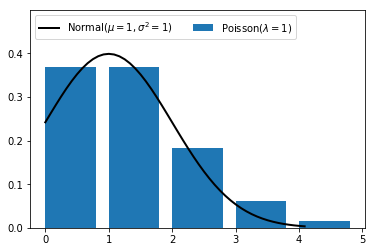

In [58]:
interact(f, mu=widgets.FloatSlider(min=1.0, max=20.0, step=1.0));

## nbconvert to HTML file

In [59]:
!jupyter nbconvert --to html ch01-intro.ipynb

[NbConvertApp] Converting notebook ch01-intro.ipynb to html
[NbConvertApp] Writing 328201 bytes to ch01-intro.html


## nbconvert to PDF file
* [Requires a LaTeX environment](https://nbconvert.readthedocs.io/en/latest/install.html#installing-tex) to be installed.
* On this system (Ubuntu Linux): ```sudo apt-get install texlive-xetex```

In [60]:
!jupyter nbconvert --to pdf ch01-intro.ipynb;

[NbConvertApp] Converting notebook ch01-intro.ipynb to pdf
[NbConvertApp] Support files will be in ch01-intro_files/
[NbConvertApp] Making directory ch01-intro_files
[NbConvertApp] Writing 52574 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex']
[NbConvertApp] CRITICAL | xelatex failed: ['xelatex', 'notebook.tex']
This is XeTeX, Version 3.14159265-2.6-0.99992 (TeX Live 2015/Debian) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./notebook.tex
LaTeX2e <2016/02/01>
Babel <3.9q> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size11.clo))
(/usr/share/texlive/texmf-dist/tex/latex/base/fontenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathpazo.sty)
(

## nbconvert to pure Python source code

In [61]:
!jupyter nbconvert ch01-intro.ipynb --to python

[NbConvertApp] Converting notebook ch01-intro.ipynb to python
[NbConvertApp] Writing 7243 bytes to ch01-intro.py


In [62]:
!ls ch01*

ch01-intro.html  ch01-intro.ipynb  ch01-intro.pdf  ch01-intro.py
